# Make Results Figures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
architecture = 'fcn'
branches = 4
shared_frac_list = [0, 0.25, 0.5, 0.75, 1]
bagging = 1.0

## Ensemble

In [3]:
df = pd.read_csv(f'results/mnist-{architecture}/B{branches}-test.csv')

In [4]:
df

,Unnamed: 0,acc_1,acc_2,acc_3,acc_4,after_mean_acc,before_mean_acc,model_id_1,model_id_2,model_id_3,model_id_4
0,0,0.9474,0.9436,0.9375,0.9425,0.9487,0.9487,1,3,7,6
1,0,0.9436,0.9435,0.9429,0.9375,0.9502,0.9503,3,5,2,7
2,0,0.9427,0.9429,0.9425,0.9463,0.9493,0.9491,4,2,6,8
3,0,0.9463,0.9474,0.9435,0.9427,0.9510,0.9512,8,1,5,4
4,0,0.9474,0.9375,0.9425,0.9429,0.9502,0.9496,1,7,6,2
5,0,0.9436,0.9427,0.9425,0.9474,0.9505,0.9507,3,4,6,1
6,0,0.9375,0.9436,0.9425,0.9435,0.9496,0.9491,7,3,6,5
7,0,0.9375,0.9425,0.9474,0.9429,0.9502,0.9496,7,6,1,2


In [5]:
avg_acc = df['before_mean_acc'].mean()
std_acc = df['before_mean_acc'].std()
print(avg_acc, std_acc)

0.9497875 0.000869215574115948


## Baseline

In [6]:
baseline_val_acc = []
for i in range(8):
    df = pd.read_csv(f'results/mnist-{architecture}/train_{i+1}.csv')
    baseline_val_acc.append(df.iloc[-1]['val_acc'])
baseline = np.mean(baseline_val_acc)
print(baseline)

0.9433000013232231


In [7]:
print(baseline_val_acc)

[0.9473999738693236, 0.942900002002716, 0.9435999989509584, 0.9427000284194946, 0.9434999823570251, 0.9424999952316284, 0.9375, 0.9463000297546388]


## Virtual Branching

In [8]:
results = {}
results_std = {}
for frac in shared_frac_list:
    val_acc = []
    for i in range(4):
        df = pd.read_csv(f'results/vb-mnist-{architecture}/' \
                         f'B{branches}/S{frac:.2f}/train_{i+1}.csv')
        val_acc.append(df.iloc[-1]['val_acc_ensemble'])
    print(frac, val_acc)
    results[frac] = np.mean(val_acc)
    results_std[frac] = np.std(val_acc)

0 [0.9508000016212464, 0.9526000022888184, 0.9508000016212464, 0.9516000151634216]
0.25 [0.9503999948501588, 0.9502999782562256, 0.9484999775886536, 0.9496999979019164]
0.5 [0.94650000333786, 0.9484999775886536, 0.9473000168800354, 0.948099970817566]
0.75 [0.9466999769210817, 0.9477999806404114, 0.9473999738693236, 0.9473999738693236]
1 [0.9484999775886536, 0.9441999793052672, 0.9459999799728394, 0.94650000333786]


In [9]:
results

{0: 0.9514500051736832,
 0.25: 0.9497249871492386,
 0.5: 0.9475999921560287,
 0.75: 0.9473249763250351,
 1: 0.9462999850511551}

## Create Figure

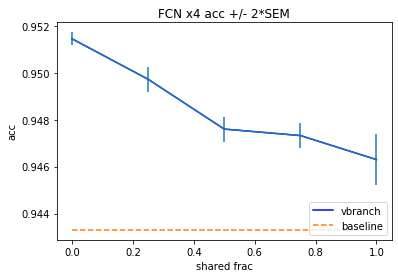

In [10]:
results_list = list(results.items())
results_list.sort()
results_list = np.array(results_list)

plt.plot(results_list[:, 0], results_list[:,1], 
         label='vbranch', color='blue')
trials = 8
error = np.sort(np.array(list(results_std.items())), 0)[:, 1] / np.sqrt(trials)
plt.errorbar(results_list[:, 0], results_list[:,1], error*2)

# plt.plot(results_list[:, 0], [avg_acc]*len(results_list), label='ensemble', linestyle='--')
plt.plot(results_list[:, 0], [baseline]*len(results_list), 
         label='baseline', linestyle='--')

plt.legend(loc='lower right')
plt.xlabel('shared frac')
plt.ylabel('acc')
plt.title(f'{architecture.upper()} x{branches} acc +/- 2*SEM')

if not os.path.isdir('figs'):
    os.system('mkdir figs')
    
plt.savefig(f'figs/{architecture}-{branches}-results.png')
plt.show()